In [1]:
import numpy as np
import scipy.io
import os
import matplotlib.pyplot as plt

In [2]:
proj_data = scipy.io.loadmat(os.path.join("data", "project_data.mat"))
A90 = scipy.io.loadmat('data/A90.mat')
A90 = A90['A']
A270 = scipy.io.loadmat('data/A90.mat')
Afull = scipy.io.loadmat('data/A.mat')
Afull = Afull['A']
sino90 = scipy.io.loadmat('data/Sinogram90.mat')
sino90 = sino90['sinogram90']
sinofull = proj_data['sinogram']
sinofull_flat = np.transpose(sinofull.flatten(order = 'F'))
sino90_flat = np.transpose(sino90.flatten(order = 'F'))

In [3]:
from pyunlocbox import functions
f1 = functions.norm_tv(maxit=50, dim=1)
n_pixels = np.product(proj_data["imgref"].shape)
tau = 1000
f2 = functions.norm_l2(y=sinofull_flat, A=Afull, lambda_=tau)
from pyunlocbox import solvers
solver = solvers.forward_backward(step=0.5/tau)
#solver = solvers.douglas_rachford(step=0.1)
model_init = np.zeros(n_pixels)
ret = solvers.solve([f1, f2], model_init, solver, rtol = 1e-6, maxit=500)

/Users/siqizhao/miniconda3/lib/python3.7/site-packages/pyunlocbox/functions.py:701: RuntimeWarning: invalid value encountered in double_scalars
  rel_obj = np.abs(obj - prev_obj) / obj


Solution found after 500 iterations:
    objective function f(sol) = 6.972713e+05
    stopping criterion: MAXIT


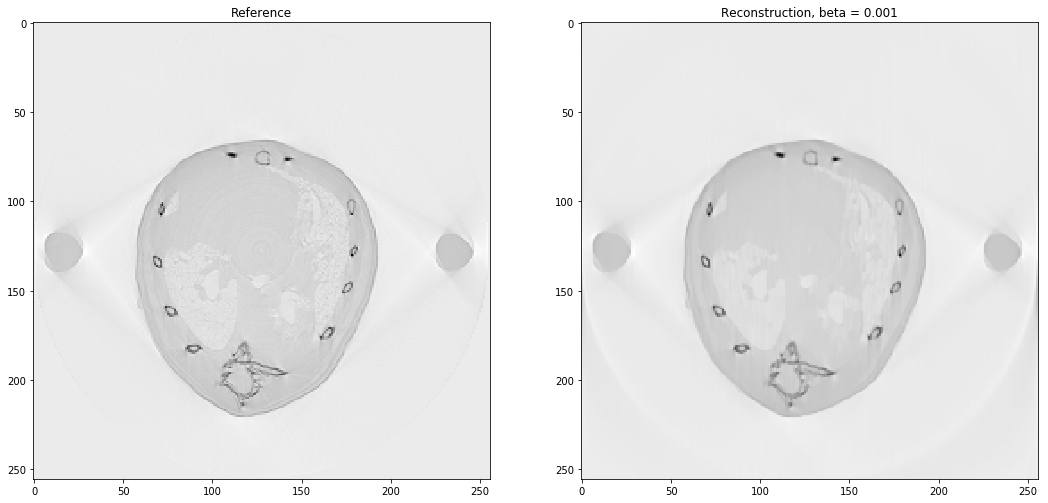

In [9]:
model = model_init
model_mat = ret['sol'].reshape(proj_data["imgref"].shape, order="F")
fig, ax = plt.subplots(ncols=2, figsize = (18,12))
ax[0].imshow(proj_data["imgref"], cmap="Greys")
ax[0].set_title("Reference")
ax[1].imshow(model_mat, cmap="Greys")
ax[1].set_title(f"Reconstruction, beta = {round(1/tau, 3)}")
plt.savefig('TV_reconstruction.png', dpi = 300)

In [7]:
np.savetxt('TV_reconstruction_full_image_1e-3.txt', proj_data["imgref"])